In [5]:
#IMPORTING NECCESARY LIBRARIES
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.linear_model import LogisticRegression

### LOADING THE DATA

In [6]:
titanic_df = pd.read_csv("tested.csv")

In [7]:
titanic_df


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [12]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [13]:
titanic_df.shape

(418, 12)

In [14]:
titanic_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [15]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [16]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [17]:
#checking for null values
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [18]:
#dropping the cabin column beacause it has over 50 percent missing values
titanic_df.drop("Cabin", axis = 1, inplace = True)

In [19]:
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,S


In [20]:
#filling the age missing values
titanic_df["Age"].fillna(titanic_df["Age"].mean(), inplace = True)

In [22]:
#filling the fare missing value
titanic_df["Fare"].fillna(titanic_df["Fare"].mean(), inplace = True)

In [25]:
#checking again to confirm there are no missing values
titanic_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [26]:
titanic_df["Sex"].value_counts()

male      266
female    152
Name: Sex, dtype: int64

In [27]:
titanic_df["Embarked"].unique()

array(['Q', 'S', 'C'], dtype=object)

In [28]:
titanic_df["Sex"].unique()

array(['male', 'female'], dtype=object)

In [29]:
titanic_df["Survived"].value_counts()

0    266
1    152
Name: Survived, dtype: int64

In [30]:
sns.set()

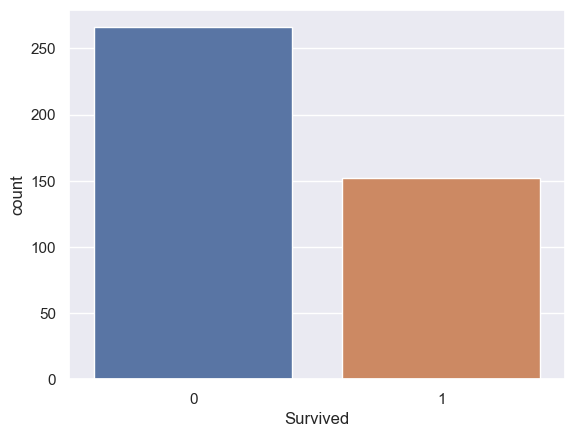

In [31]:
#plotting bar plot 
sns.countplot(x ="Survived", data =titanic_df)
plt.show()

<Axes: xlabel='Sex', ylabel='count'>

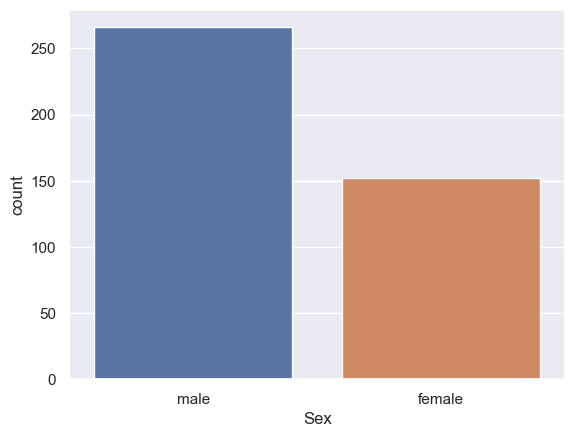

In [32]:
sns.countplot(x="Sex", data=titanic_df)

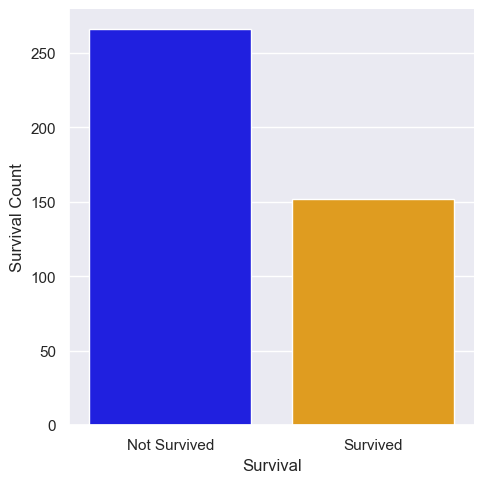

In [33]:
#mapping the values in survived column to "not survived" and "survived"
titanic_df["Survived_cat"] = titanic_df["Survived"].map({1: "Survived", 0: "Not Survived"})
colours = ["blue", "orange"]
ax = sns.catplot(x = "Survived_cat", data = titanic_df, kind = "count", palette = colours)
ax.set_axis_labels("Survival", "Survival Count")

In [34]:
titanic_df["Pclass"].unique()

array([3, 2, 1], dtype=int64)

In [35]:
titanic_df["Pclass"].value_counts()

3    218
1    107
2     93
Name: Pclass, dtype: int64

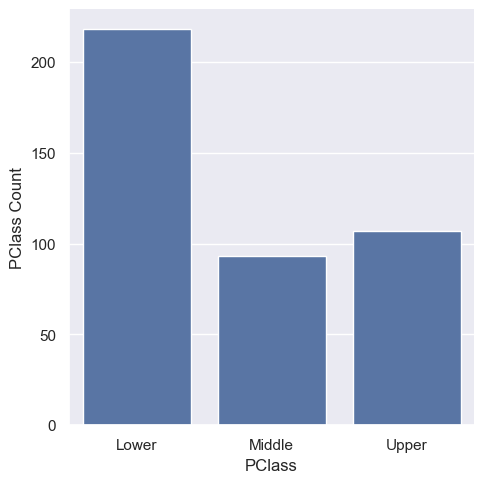

In [36]:
#mapping the unique values in pclass to show that 1 == "upper", 2=="middle", 3=="lower"
titanic_df["Pclass_cat"] = titanic_df["Pclass"].map({1: "Upper", 2: "Middle", 3: "Lower"})
ax = sns.catplot(x = "Pclass_cat", data = titanic_df, kind = "count", color = "b")
ax.set_axis_labels("PClass", "PClass Count")

C:\Users\Orebi\AppData\Local\Temp\ipykernel_4732\4155724020.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(titanic_df.corr(), cmap ="YlGnBu", annot = True)


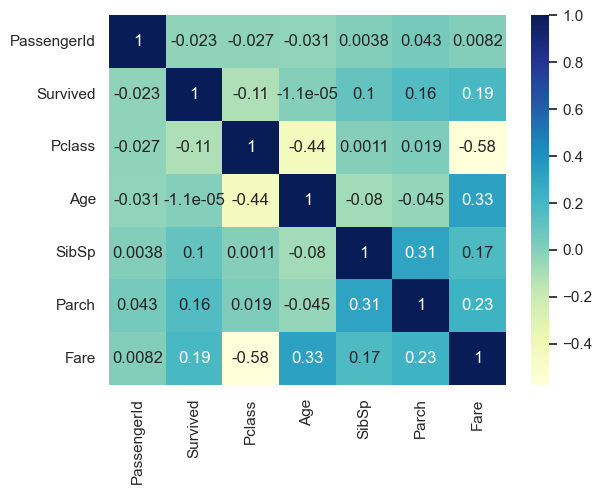

In [38]:
sns.heatmap(titanic_df.corr(), cmap ="YlGnBu", annot = True)
plt.show()

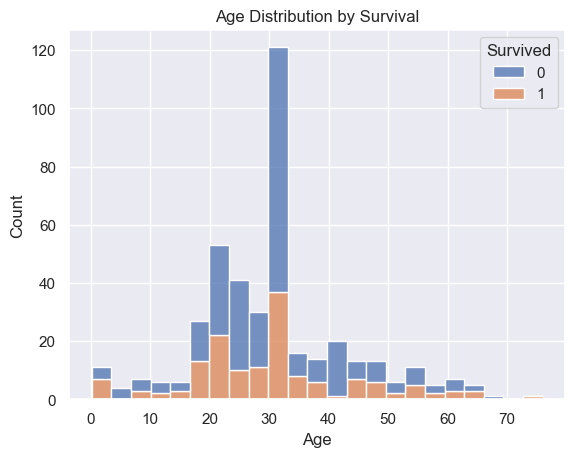

In [39]:
sns.histplot(data=titanic_df, x='Age', hue='Survived', multiple='stack')
plt.title("Age Distribution by Survival")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()







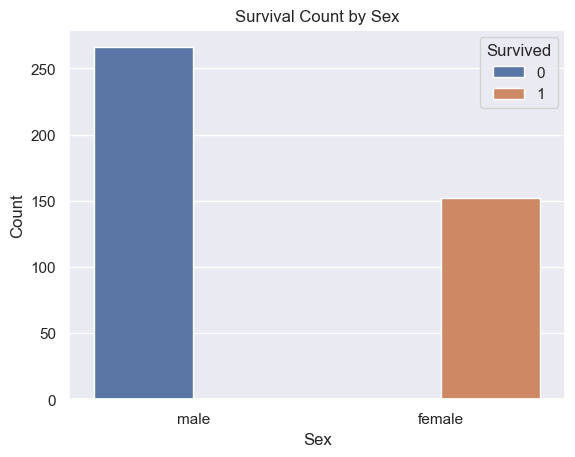

In [41]:
sns.countplot(x="Sex", hue="Survived", data=titanic_df)

plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Survival Count by Sex')
plt.show()


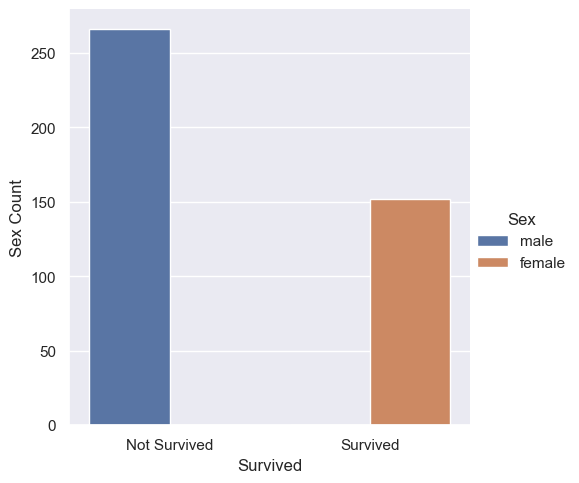

In [42]:
ax = sns.catplot(x = "Survived_cat", data = titanic_df, kind = "count", hue = "Sex")
ax.set_axis_labels("Survived", "Sex Count")

<Axes: xlabel='Pclass', ylabel='count'>

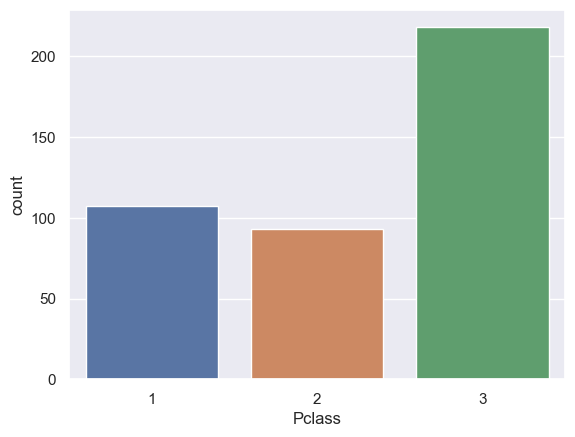

In [43]:
sns.countplot(x="Pclass", data=titanic_df)

<Axes: xlabel='Pclass', ylabel='count'>

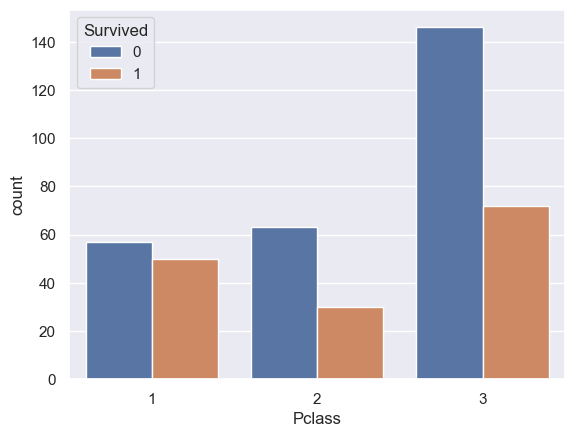

In [44]:
sns.countplot(x="Pclass", hue ="Survived", data = titanic_df)

<Axes: xlabel='Embarked', ylabel='count'>

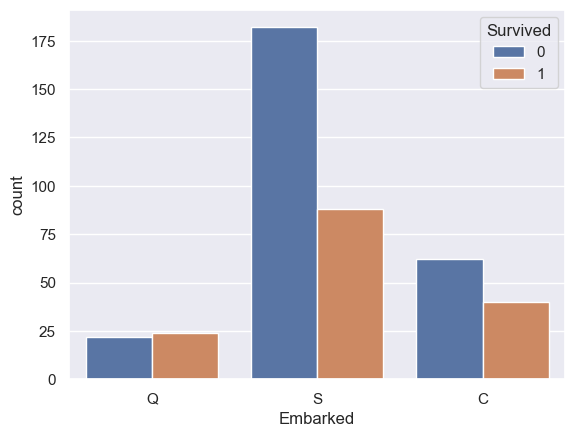

In [45]:
sns.countplot(x="Embarked", hue = "Survived", data = titanic_df)

In [46]:
titanic_df["SibSp"].value_counts()

0    283
1    110
2     14
3      4
4      4
8      2
5      1
Name: SibSp, dtype: int64

<Axes: xlabel='SibSp', ylabel='count'>

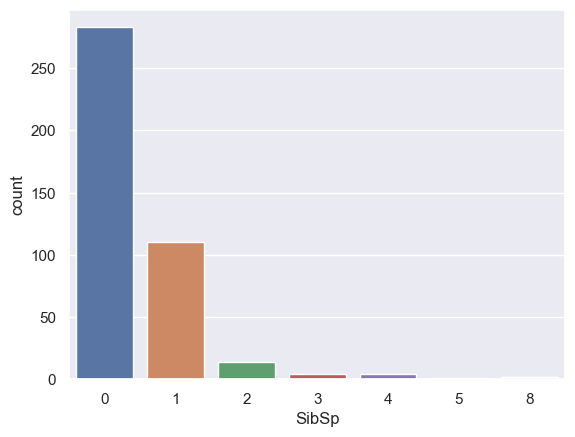

In [49]:
sns.countplot(x ="SibSp", data = titanic_df)

<Axes: xlabel='SibSp', ylabel='count'>

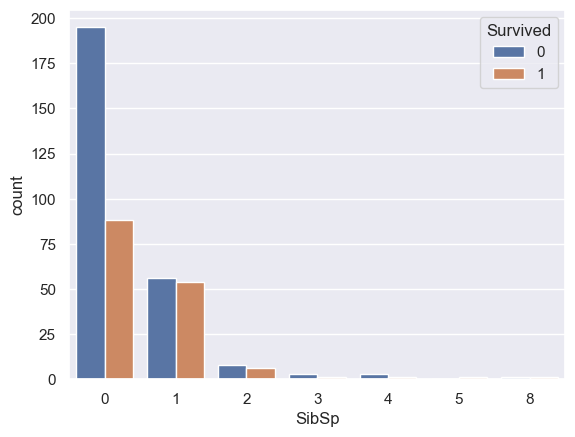

In [50]:
sns.countplot(x="SibSp", hue = "Survived", data = titanic_df)

<Axes: xlabel='Sex', ylabel='count'>

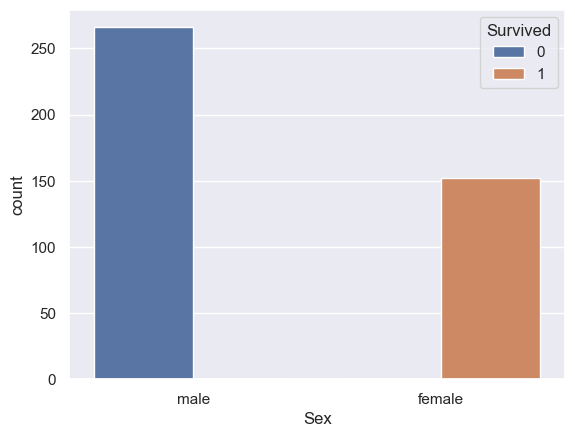

In [52]:
 sns.countplot(x="Sex", hue = "Survived", data = titanic_df)

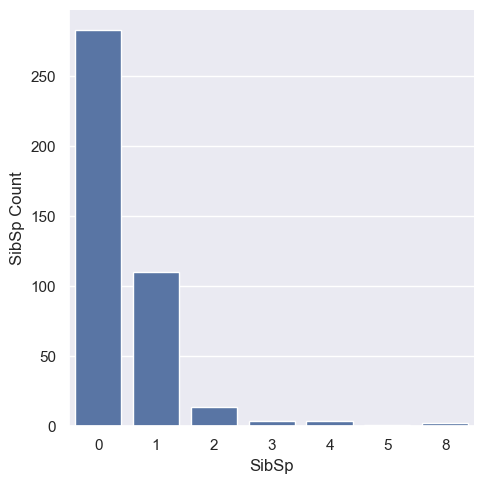

In [53]:
ax = sns.catplot(x = "SibSp", data = titanic_df, kind = "count", color = "b")
ax.set_axis_labels("SibSp", "SibSp Count")

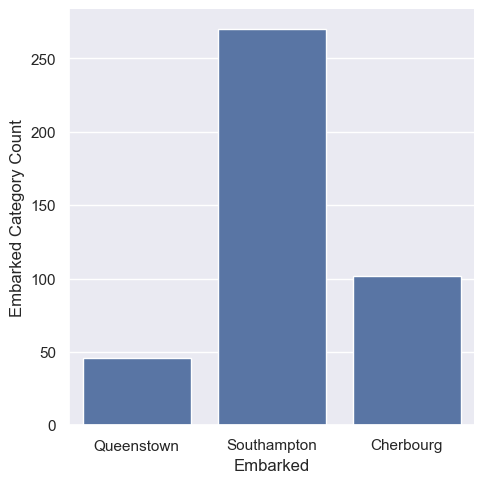

In [56]:
titanic_df["Embarked_cat"] = titanic_df["Embarked"].map({"C": "Cherbourg", "Q": "Queenstown", "S": "Southampton"})
ax = sns.catplot(x = "Embarked_cat", data = titanic_df, kind = "count", color = "b")
ax.set_axis_labels("Embarked", "Embarked Category Count")

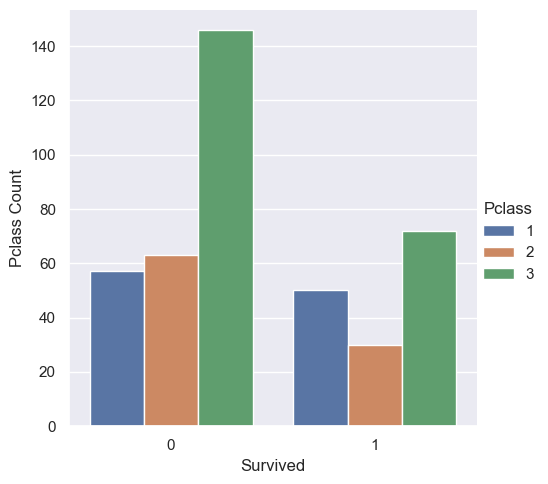

In [57]:
ax = sns.catplot(x = "Survived", data = titanic_df, kind = "count", hue = "Pclass")
ax.set_axis_labels("Survived", "Pclass Count")

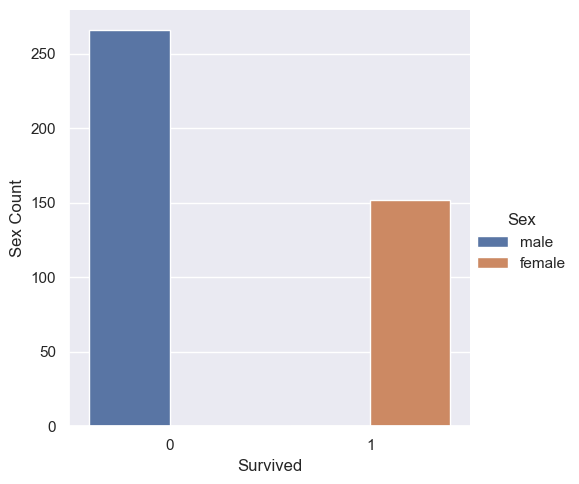

In [58]:
ax = sns.catplot(x = "Survived", data = titanic_df, kind = "count", hue = "Sex")
ax.set_axis_labels("Survived", "Sex Count")

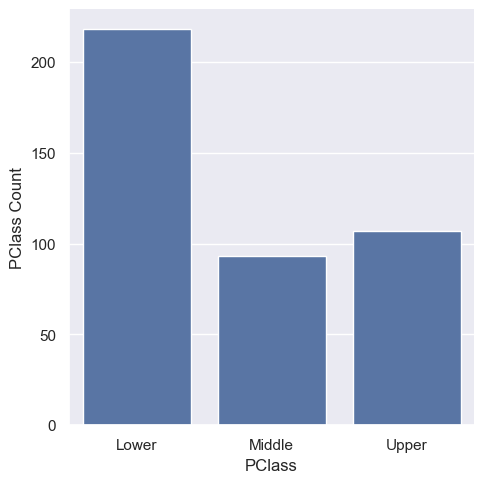

In [60]:
titanic_df["Pclass_cat"] = titanic_df["Pclass"].map({1: "Upper", 2: "Middle", 3: "Lower"})
ax = sns.catplot(x = "Pclass_cat", data = titanic_df, kind = "count", color = "b")
ax.set_axis_labels("PClass", "PClass Count")

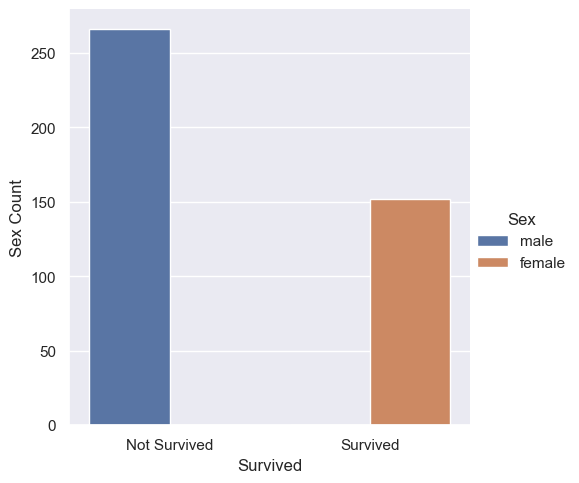

In [62]:
ax = sns.catplot(x = "Survived_cat", data = titanic_df, kind = "count", hue = "Sex")
ax.set_axis_labels("Survived", "Sex Count")

In [65]:
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder
le = LabelEncoder()
titanic_df['Sex'] = le.fit_transform(titanic_df['Sex'])
#df.info()

In [66]:
titanic_df.drop("Survived_cat", axis = 1, inplace= True)

In [67]:
titanic_df.drop("Embarked_cat", axis = 1, inplace= True)

In [68]:
titanic_df.drop("Pclass_cat", axis = 1, inplace= True)

In [71]:
#using label encoder to change the unique values to int
le = LabelEncoder()
titanic_df['Embarked'] = le.fit_transform(titanic_df['Embarked'])

In [72]:
titanic_df["Embarked"].unique()

array([1, 2, 0])

In [73]:
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",1,34.50000,0,0,330911,7.8292,1
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.00000,1,0,363272,7.0000,2
2,894,0,2,"Myles, Mr. Thomas Francis",1,62.00000,0,0,240276,9.6875,1
3,895,0,3,"Wirz, Mr. Albert",1,27.00000,0,0,315154,8.6625,2
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.00000,1,1,3101298,12.2875,2
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",1,30.27259,0,0,A.5. 3236,8.0500,2
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",0,39.00000,0,0,PC 17758,108.9000,0
415,1307,0,3,"Saether, Mr. Simon Sivertsen",1,38.50000,0,0,SOTON/O.Q. 3101262,7.2500,2
416,1308,0,3,"Ware, Mr. Frederick",1,30.27259,0,0,359309,8.0500,2


In [75]:
#dropping unneccessary values
titanic_df.drop("Name", axis= 1, inplace = True)

In [76]:
titanic_df.drop("Ticket", axis= 1, inplace = True)

In [77]:
titanic_df.drop("PassengerId", axis= 1, inplace = True)

In [78]:
titanic_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,34.50000,0,0,7.8292,1
1,1,3,0,47.00000,1,0,7.0000,2
2,0,2,1,62.00000,0,0,9.6875,1
3,0,3,1,27.00000,0,0,8.6625,2
4,1,3,0,22.00000,1,1,12.2875,2
...,...,...,...,...,...,...,...,...
413,0,3,1,30.27259,0,0,8.0500,2
414,1,1,0,39.00000,0,0,108.9000,0
415,0,3,1,38.50000,0,0,7.2500,2
416,0,3,1,30.27259,0,0,8.0500,2


In [79]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  418 non-null    int64  
 1   Pclass    418 non-null    int64  
 2   Sex       418 non-null    int32  
 3   Age       418 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Fare      418 non-null    float64
 7   Embarked  418 non-null    int32  
dtypes: float64(2), int32(2), int64(4)
memory usage: 23.0 KB


### Training and evaluating the model

In [80]:
y = titanic_df["Survived"]
X = titanic_df.drop("Survived", axis = 1)

In [ ]:
X

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33 ) 

In [82]:
X_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
408,3,0,30.27259,0,0,7.7208,1
103,3,1,26.00000,0,0,7.7750,2
393,2,1,47.00000,0,0,10.5000,2
311,3,1,22.00000,0,0,7.2250,0
414,1,0,39.00000,0,0,108.9000,0
...,...,...,...,...,...,...,...
166,1,1,48.00000,0,0,50.4958,0
243,3,1,30.27259,0,0,7.8875,2
389,3,1,6.00000,3,1,21.0750,2
384,2,1,30.27259,0,0,12.8750,2


In [83]:
logreg =LogisticRegression()

In [84]:
logreg.fit(X_train,y_train)

C:\Users\Orebi\OneDrive\ana\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [85]:
pred = logreg.predict(X_test)
pred

array([0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0], dtype=int64)

In [86]:
accuracy = accuracy_score(y_test,pred) * 100
accuracy

100.0

In [88]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc

RandomForestClassifier()

In [89]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [90]:
pred2 = rfc.predict(X_test)

In [91]:
accuracy_score(y_test,pred2) * 100

100.0

In [92]:
from sklearn.ensemble import GradientBoostingClassifier

In [93]:
gbc = GradientBoostingClassifier()

In [94]:
gbc.fit(X_train,y_train)

GradientBoostingClassifier()

In [97]:
pred3 = gbc.predict(X_test)

In [96]:
accuracy_score(y_test,pred3) * 100

100.0